In [55]:
from sklearn.cluster import KMeans
from  matplotlib import pyplot as plt
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.image as mpimg
from sklearn import datasets
import numpy as np
import cv2


def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X



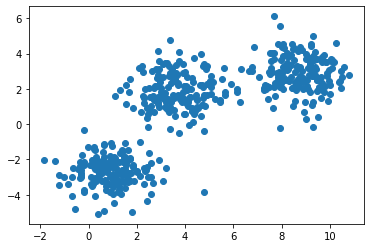

In [24]:
data = generate_data(500, 1)
plt.scatter(data[:,0], data[:,1]) 

In [31]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data) 
predicted = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_  
plt.scatter(data[:,0],data[:,1],c=predicted) 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
print (centroids)

[[ 0.90432871 -2.65519353]
 [ 8.74570381  2.85880153]
 [ 3.68603225  1.85947866]]


([<matplotlib.axis.XTick at 0x7fb4771e0280>,
 <a list of 18 Text major ticklabel objects>)

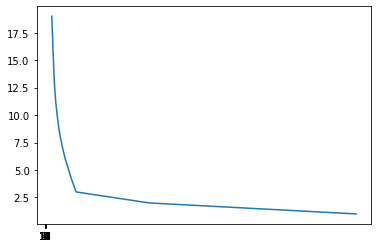

In [36]:
kriterijska=[]  
clusters=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    kriterijska.append(kmeans.inertia_) 
    clusters.append(i)
plt.plot(kriterijska, clusters)  
plt.xticks(np.arange(min(clusters), max(clusters), 1)) 

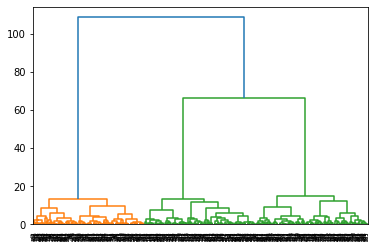

In [39]:
Z = linkage(data, 'ward')
fig = plt.figure()
dn = dendrogram(Z)

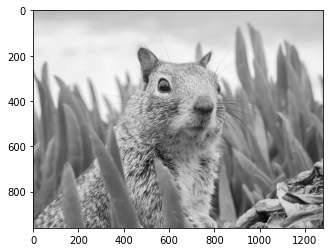

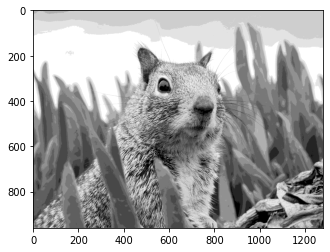

In [59]:
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face =  mpimg.imread('example_grayscale.png')    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = KMeans(n_clusters=10,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')

#Što je broj clustera manji, slika je prikazana s manje boja(za 2, dvije boje, za 10, deset boja)
#Prva slika sadrži vrijednosti sve vrijednosti 0-255 što je 1bajt iliti 8bitova
#Druga slika sadrži 10 vrijednosti što bi se moglo prikazati s 4bita
#Znaci mogla bi se postići kompresija od 50%

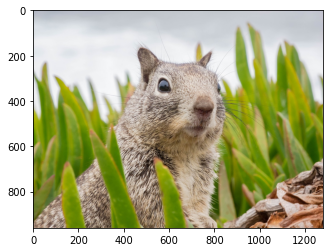

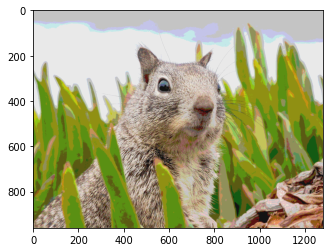

In [81]:
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face =  mpimg.imread('example.png')    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = KMeans(n_clusters=5,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')